# PROJET ENERGIE - EXPLORATION DES DONNEES

**Objectifs du projet :**

Constater le phasage entre la consommation et la production énergétique au niveau national et au niveau régional (risque de black out notamment) :
*   Analyse au niveau régional pour en déduire une prévision de consommation ;
*   Analyse par filière de production : énergie nucléaire / renouvelable ;
*   Focus sur les énergies renouvelables (où sont-elles implantées ?).

La source de données est celle de l’ODRE (Open Data Réseaux Énergies) : on a accès à toutes les informations de consommation et production par filière jour par jour (toutes les 1/2 heure) depuis 2013.


**Affichage du fichier de données :**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/ProjetEnergie/eco2mix-regional-cons-def.csv', sep=';')

df.head()

Mounted at /content/gdrive


,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30
0,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28,Normandie,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53,Bretagne,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,32,Hauts-de-France,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75,Nouvelle-Aquitaine,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Les informations du dataset :**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980288 entries, 0 to 1980287
Data columns (total 32 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Code INSEE région    int64  
 1   Région               object 
 2   Nature               object 
 3   Date                 object 
 4   Heure                object 
 5   Date - Heure         object 
 6   Consommation (MW)    float64
 7   Thermique (MW)       float64
 8   Nucléaire (MW)       float64
 9   Eolien (MW)          float64
 10  Solaire (MW)         float64
 11  Hydraulique (MW)     float64
 12  Pompage (MW)         float64
 13  Bioénergies (MW)     float64
 14  Ech. physiques (MW)  float64
 15  Stockage batterie    float64
 16  Déstockage batterie  float64
 17  Eolien terrestre     float64
 18  Eolien offshore      float64
 19  TCO Thermique (%)    float64
 20  TCH Thermique (%)    float64
 21  TCO Nucléaire (%)    float64
 22  TCH Nucléaire (%)    float64
 23  TCO Eolien (%)       float64
 24

**Est-ce qu'il y a des doublons dans ce dataset ?**

In [ ]:
print(df.duplicated().unique())

[False]


**Les taux de valeurs manquantes :**

In [ ]:
taux = pd.DataFrame(df.isna().sum(), columns=["Nombre de NA"])
taux['Taux de NA'] = taux['Nombre de NA'] / df.shape[0] * 100
display(taux)

,Nombre de NA,Taux de NA
Code INSEE région,0,0.000000
Région,0,0.000000
Nature,0,0.000000
Date,0,0.000000
Heure,0,0.000000
Date - Heure,0,0.000000
Consommation (MW),12,0.000606
Thermique (MW),12,0.000606
Nucléaire (MW),825127,41.667020
Eolien (MW),108,0.005454


**Voici le détail des variables numériques :**

In [ ]:
df.describe()

,Code INSEE région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30
count,1.980288e+06,1.980276e+06,1.980276e+06,1.155161e+06,1.980180e+06,1.980276e+06,1.980276e+06,1.120121e+06,1.980276e+06,1.843380e+06,...,398112.000000,508032.000000,508032.000000,508032.000000,508032.000000,263808.000000,263808.000000,263808.000000,263808.000000,0.0
mean,4.991667e+01,4.497690e+03,3.783493e+02,6.232625e+03,2.564869e+02,9.196955e+01,6.001617e+02,-1.161740e+02,8.332810e+01,-4.633691e+02,...,31.110610,9.922807,27.050076,2.799379,33.714231,11.723816,27.980819,2.343480,53.879981,NaN
std,2.564001e+01,2.170361e+03,5.407519e+02,3.043245e+03,4.333763e+02,2.247761e+02,1.028933e+03,3.134738e+02,4.462511e+01,4.209660e+03,...,30.566573,13.727964,20.906299,5.318540,26.536978,17.097511,27.480661,0.874629,12.776024,NaN
min,1.100000e+01,7.200000e+02,-8.300000e+01,-1.440000e+02,-6.000000e+00,-2.300000e+01,-6.000000e+00,-2.581000e+03,4.000000e+00,-1.221900e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.630000,13.990000,NaN
25%,2.775000e+01,2.789000e+03,2.400000e+01,3.598000e+03,2.700000e+01,0.000000e+00,5.000000e+00,-1.600000e+01,4.800000e+01,-3.802000e+03,...,0.000000,0.360000,9.140000,0.030000,0.170000,0.120000,12.180000,1.740000,45.450000,NaN
50%,4.800000e+01,4.111000e+03,1.560000e+02,6.214000e+03,1.050000e+02,1.000000e+00,5.700000e+01,0.000000e+00,7.400000e+01,8.800000e+01,...,27.040000,3.980000,23.320000,1.680000,39.940000,1.980000,25.100000,2.150000,53.690000,NaN
75%,7.525000e+01,5.741000e+03,4.910000e+02,8.722000e+03,2.990000e+02,6.700000e+01,8.790000e+02,0.000000e+00,1.160000e+02,2.141000e+03,...,54.880000,14.460000,41.870000,2.630000,57.500000,18.370000,42.100000,2.740000,63.980000,NaN
max,9.300000e+01,1.533800e+04,4.293000e+03,1.363200e+04,4.900000e+03,2.894000e+03,8.742000e+03,0.000000e+00,5.480000e+02,1.395900e+04,...,102.010000,103.560000,117.980000,80.180000,112.430000,115.960000,2550.000000,9.690000,243.560000,NaN


**Pour aller encore plus loin, voici la matrice de corrélation :**

<ipython-input-3-1e6cbe68f964>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrice = df.corr()


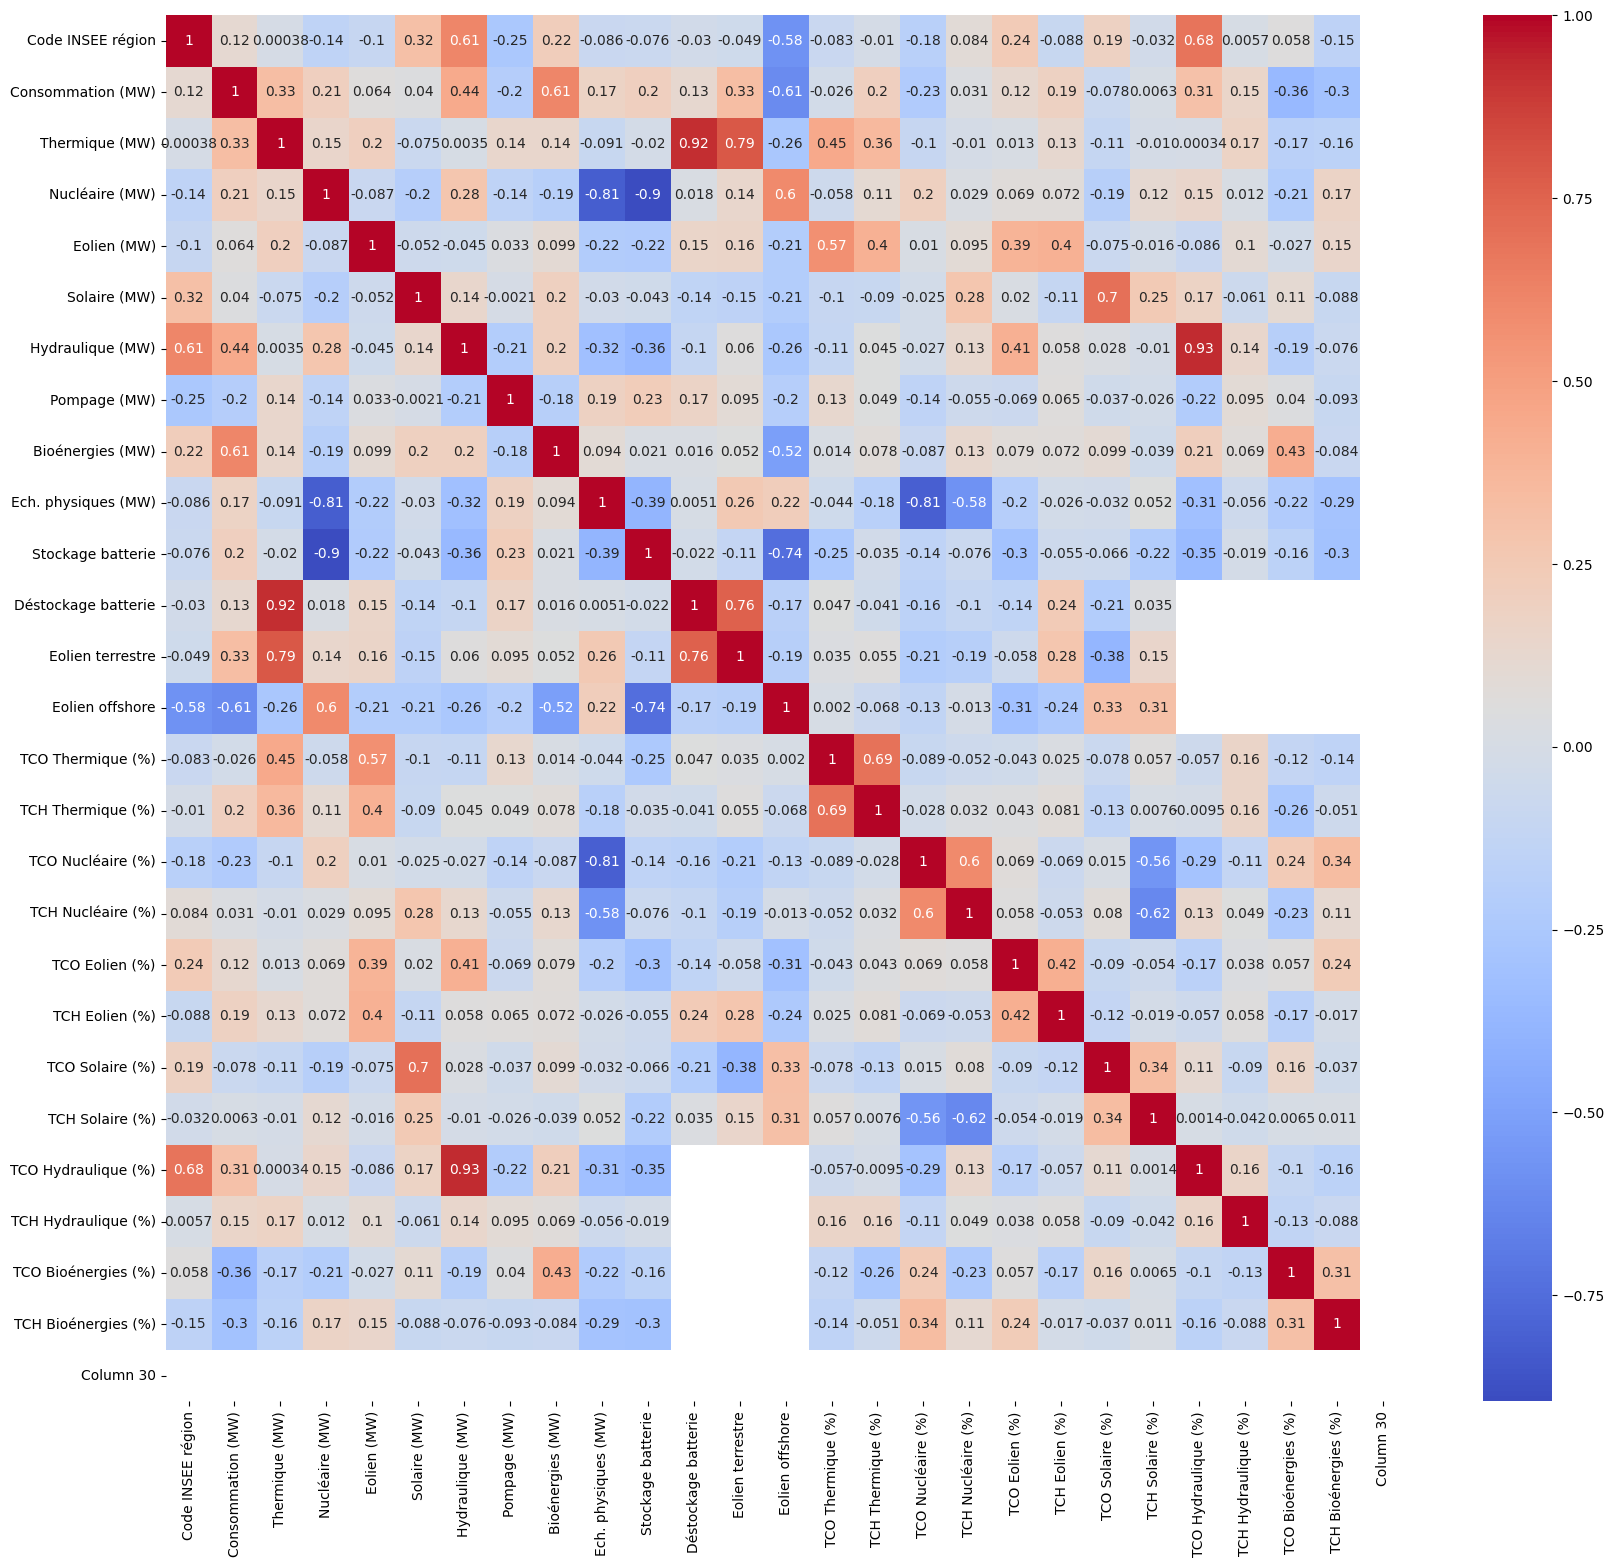

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
matrice = df.corr()
fig, ax = plt.subplots(figsize=(20,18))
sns.heatmap(data=matrice, ax=ax, annot=True, cmap='coolwarm');

In [ ]:
display(df.corr())

<ipython-input-4-ad7c2482e61a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(df.corr())


,Code INSEE région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30
Code INSEE région,1.000000,0.118647,0.000383,-0.142950,-0.099546,0.317946,0.611173,-0.252656,0.222553,-0.086391,...,0.084069,0.239750,-0.088212,0.190966,-0.032481,0.684020,0.005710,0.058053,-0.154462,NaN
Consommation (MW),0.118647,1.000000,0.330662,0.206711,0.063699,0.040126,0.439220,-0.203229,0.613220,0.173972,...,0.030780,0.120288,0.192923,-0.078462,0.006256,0.311337,0.149497,-0.360187,-0.297318,NaN
Thermique (MW),0.000383,0.330662,1.000000,0.147139,0.204424,-0.074674,0.003512,0.137524,0.135295,-0.090841,...,-0.010491,0.013164,0.126197,-0.108612,-0.010084,0.000335,0.172242,-0.170632,-0.161162,NaN
Nucléaire (MW),-0.142950,0.206711,0.147139,1.000000,-0.087222,-0.198369,0.276029,-0.144770,-0.185943,-0.814776,...,0.028914,0.068543,0.072163,-0.186589,0.117004,0.145498,0.011764,-0.211290,0.167152,NaN
Eolien (MW),-0.099546,0.063699,0.204424,-0.087222,1.000000,-0.052341,-0.045074,0.032993,0.099427,-0.215501,...,0.095448,0.388393,0.404117,-0.075395,-0.016470,-0.085588,0.102899,-0.027278,0.145699,NaN
Solaire (MW),0.317946,0.040126,-0.074674,-0.198369,-0.052341,1.000000,0.136834,-0.002066,0.195772,-0.030253,...,0.278576,0.020132,-0.108114,0.698537,0.246222,0.171452,-0.060992,0.109294,-0.088427,NaN
Hydraulique (MW),0.611173,0.439220,0.003512,0.276029,-0.045074,0.136834,1.000000,-0.209471,0.197227,-0.317390,...,0.132925,0.411783,0.058240,0.028264,-0.010364,0.932415,0.135558,-0.186885,-0.076003,NaN
Pompage (MW),-0.252656,-0.203229,0.137524,-0.144770,0.032993,-0.002066,-0.209471,1.000000,-0.184476,0.191505,...,-0.054848,-0.069162,0.064622,-0.036910,-0.025823,-0.217857,0.095212,0.040264,-0.093474,NaN
Bioénergies (MW),0.222553,0.613220,0.135295,-0.185943,0.099427,0.195772,0.197227,-0.184476,1.000000,0.094393,...,0.130892,0.079354,0.071582,0.098805,-0.039393,0.210392,0.068714,0.428504,-0.083626,NaN
Ech. physiques (MW),-0.086391,0.173972,-0.090841,-0.814776,-0.215501,-0.030253,-0.317390,0.191505,0.094393,1.000000,...,-0.580047,-0.197672,-0.025811,-0.032326,0.051808,-0.310352,-0.056147,-0.223860,-0.291721,NaN


**Distribution des données avec des boxplot :**

<Axes: >

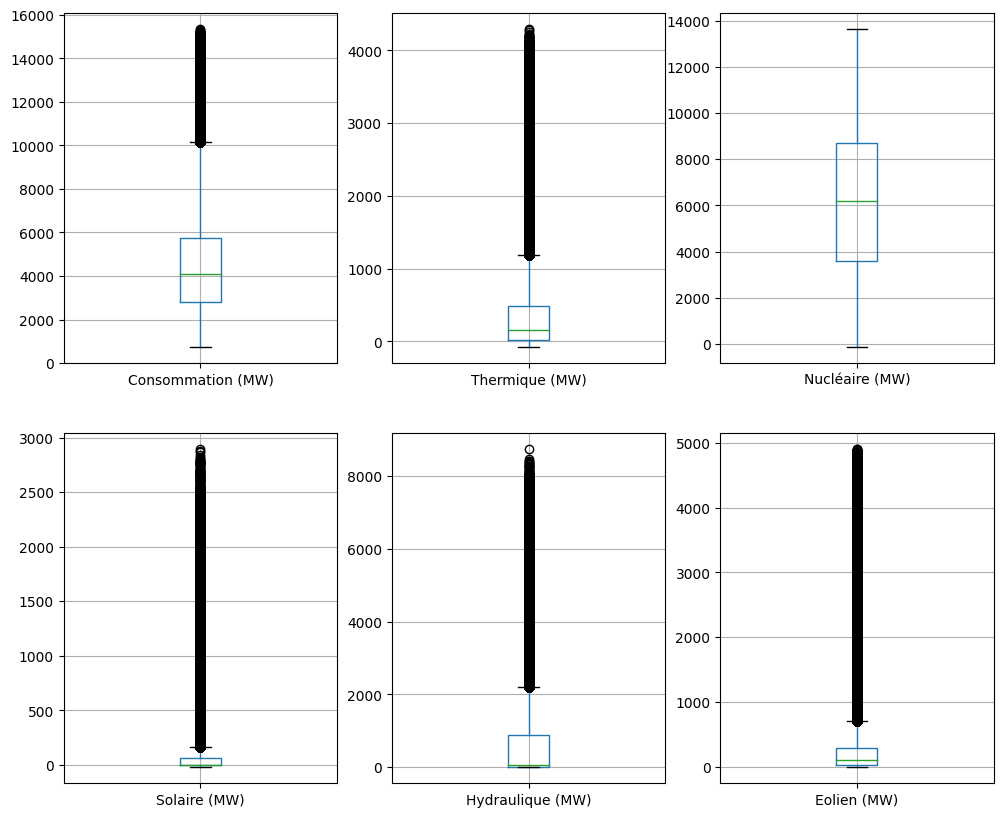

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))

plt.subplot(231)
df.boxplot('Consommation (MW)')
plt.subplot(232)
df.boxplot('Thermique (MW)')
plt.subplot(233)
df.boxplot('Nucléaire (MW)')

plt.subplot(234)
df.boxplot('Solaire (MW)')
plt.subplot(235)
df.boxplot('Hydraulique (MW)')
plt.subplot(236)
df.boxplot('Eolien (MW)')


<Axes: >

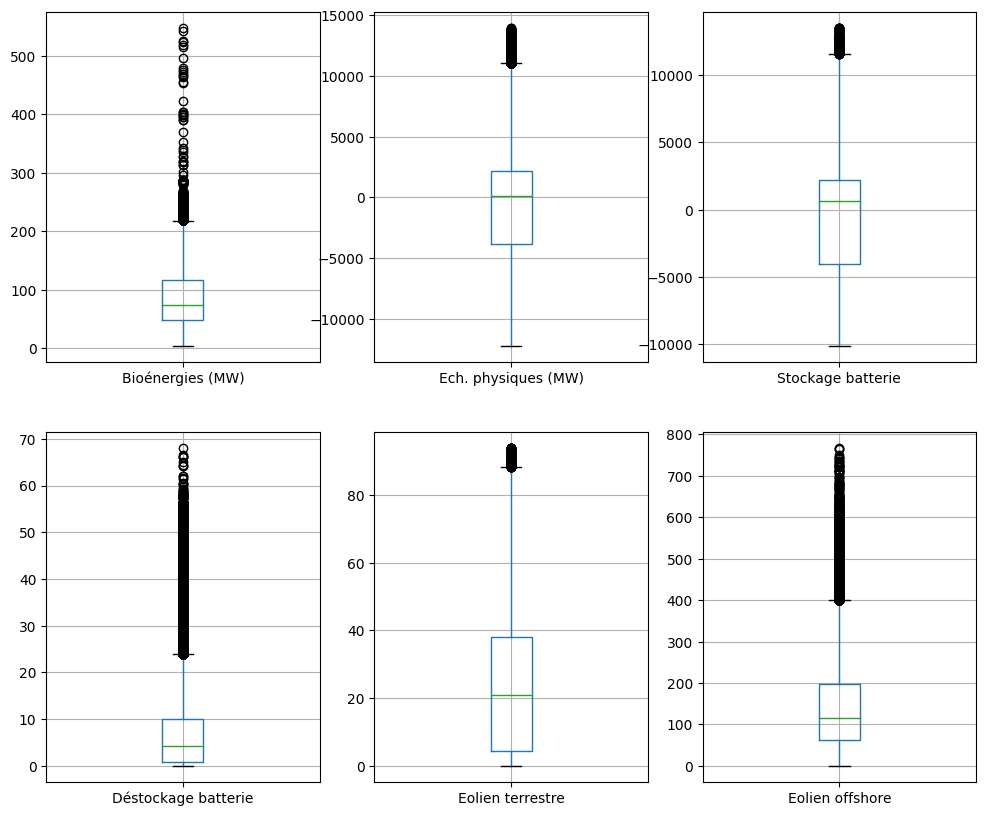

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(231)
df.boxplot('Bioénergies (MW)')
plt.subplot(232)
df.boxplot('Ech. physiques (MW)')
plt.subplot(233)
df.boxplot('Stockage batterie')

plt.subplot(234)
df.boxplot('Déstockage batterie')
plt.subplot(235)
df.boxplot('Eolien terrestre')
plt.subplot(236)
df.boxplot('Eolien offshore')

<Axes: >

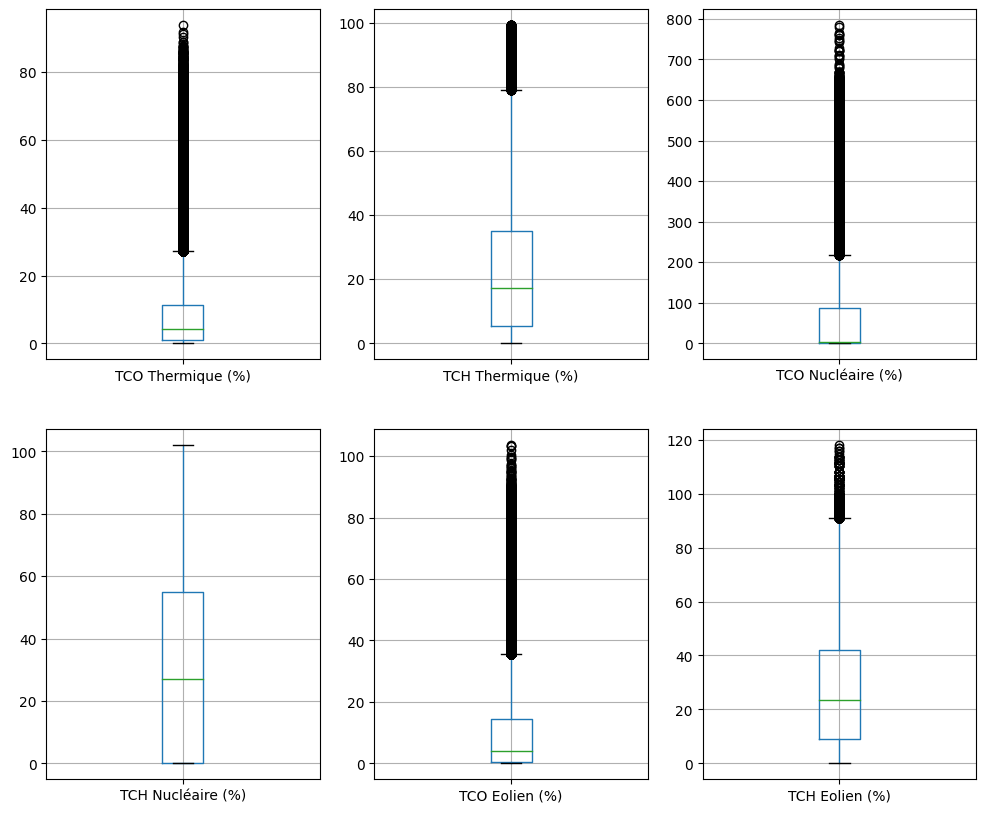

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(231)
df.boxplot('TCO Thermique (%)')
plt.subplot(232)
df.boxplot('TCH Thermique (%)')
plt.subplot(233)
df.boxplot('TCO Nucléaire (%)')

plt.subplot(234)
df.boxplot('TCH Nucléaire (%)')
plt.subplot(235)
df.boxplot('TCO Eolien (%)')
plt.subplot(236)
df.boxplot('TCH Eolien (%)')

<Axes: >

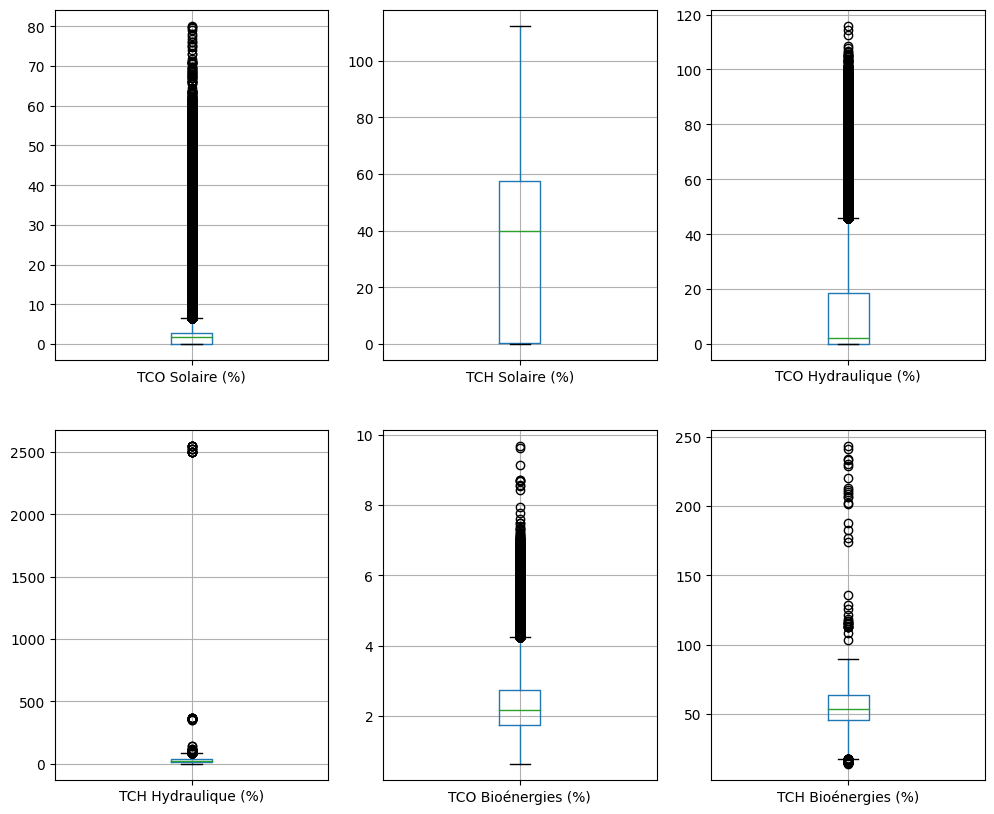

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(231)
df.boxplot('TCO Solaire (%)')
plt.subplot(232)
df.boxplot('TCH Solaire (%)')
plt.subplot(233)
df.boxplot('TCO Hydraulique (%)')

plt.subplot(234)
df.boxplot('TCH Hydraulique (%)')
plt.subplot(235)
df.boxplot('TCO Bioénergies (%)')
plt.subplot(236)
df.boxplot('TCH Bioénergies (%)')

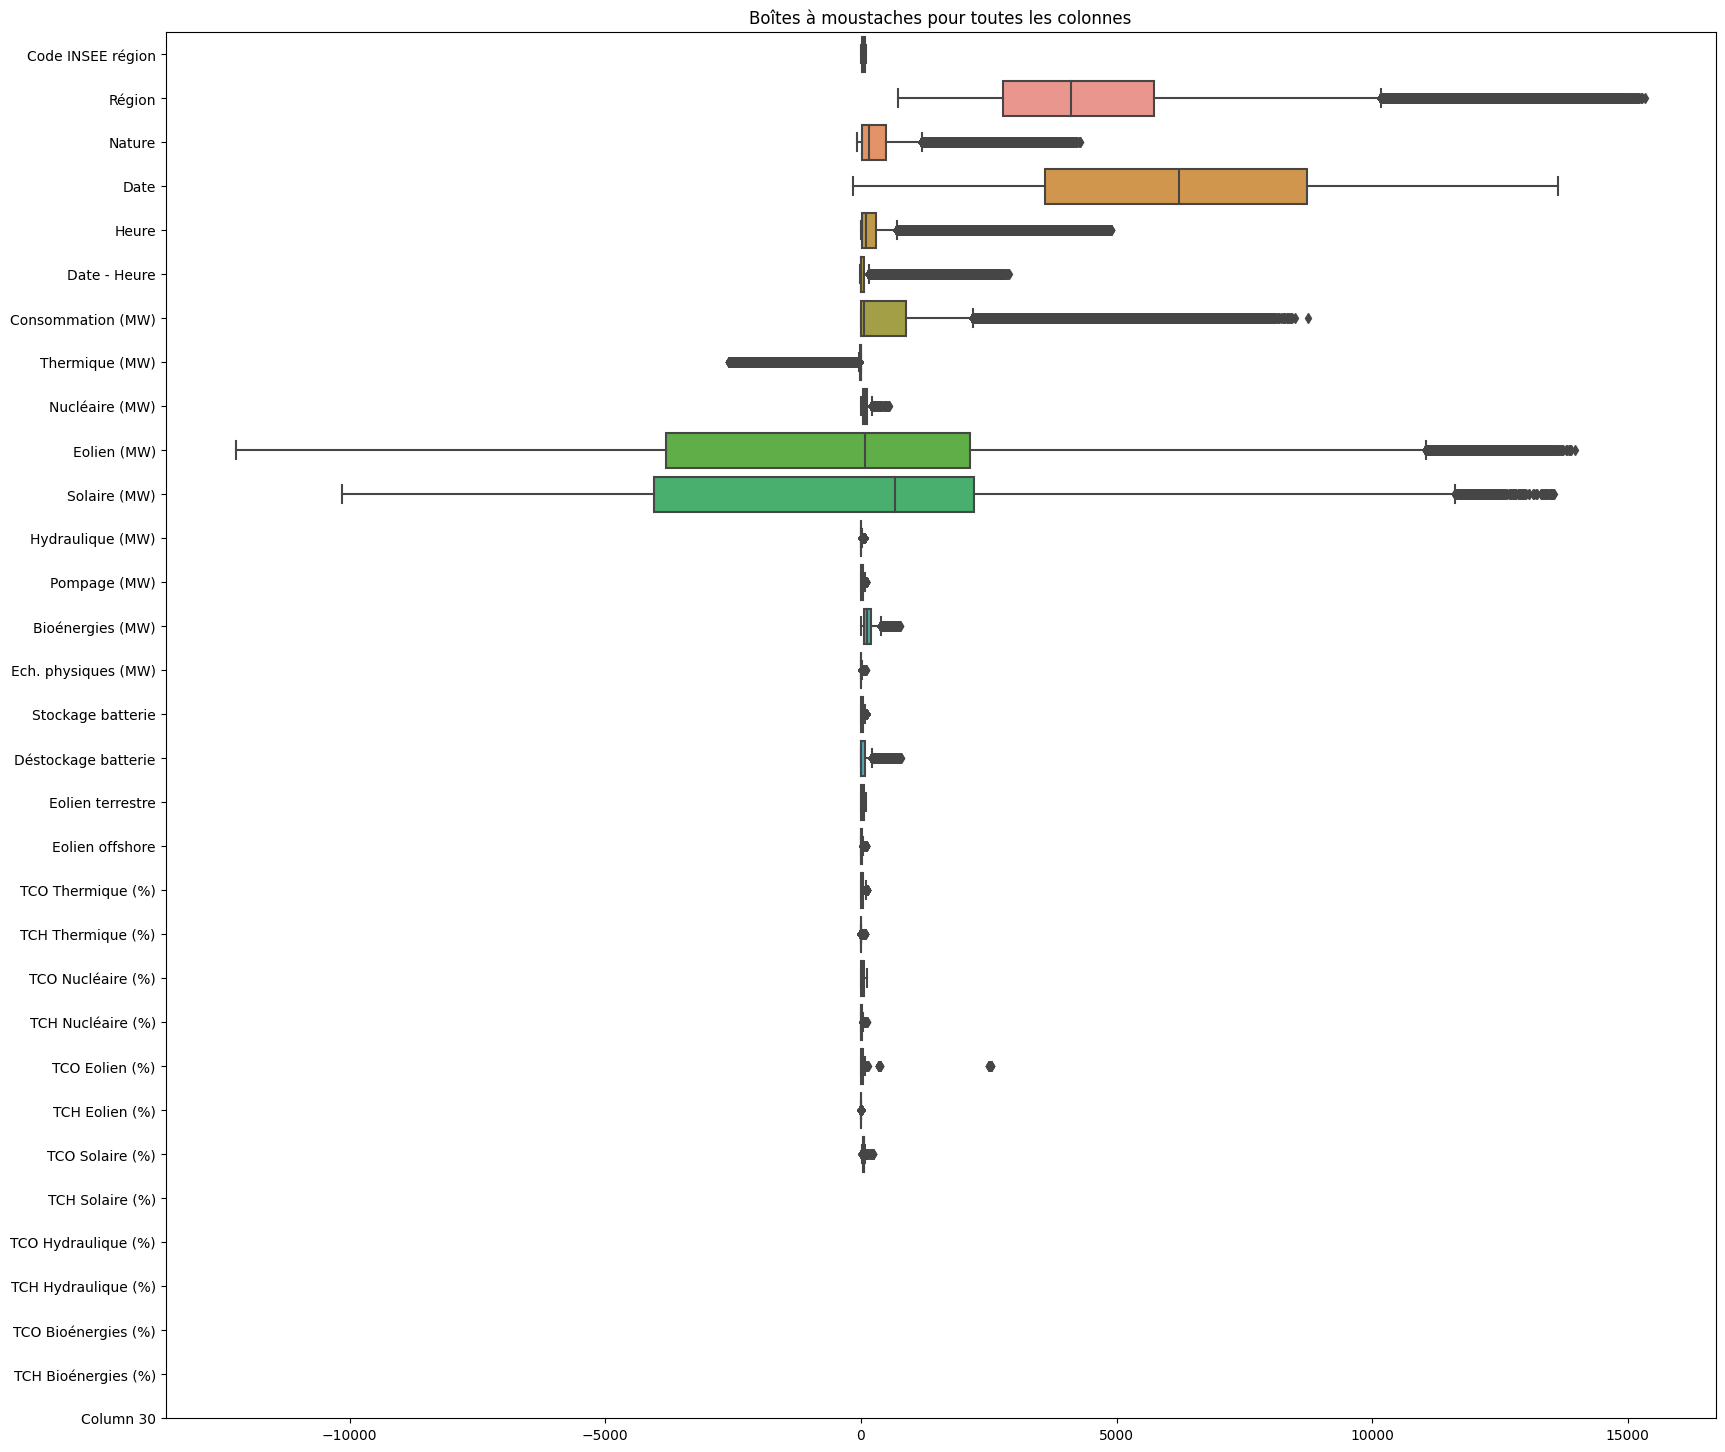

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que 'df' est votre DataFrame

# Créez une nouvelle figure
plt.figure(figsize=(20, 18))

# Utilisez sns.boxplot avec l'orientation "horizontal" pour chaque colonne
sns.boxplot(data=df, orient="h")

# Ajoutez des étiquettes pour l'axe Y
plt.yticks(range(len(df.columns)), df.columns)

# Ajoutez un titre
plt.title("Boîtes à moustaches pour toutes les colonnes")

# Affichez la figure
plt.show()

**Distribution des données avec des histogrammes :**

<Axes: xlabel='Eolien (MW)', ylabel='Count'>

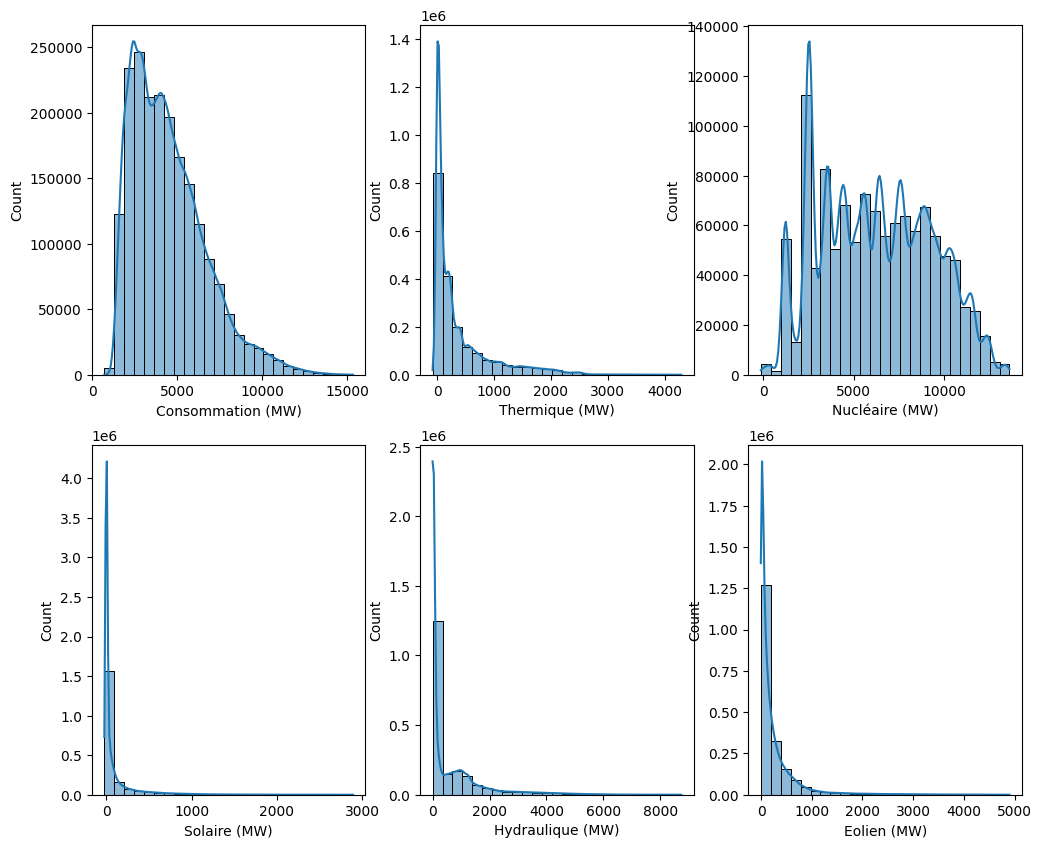

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))

plt.subplot(231)
sns.histplot(data = df, x='Consommation (MW)', bins=25, kde=True)
plt.subplot(232)
sns.histplot(data = df, x='Thermique (MW)', bins=25, kde=True)
plt.subplot(233)
sns.histplot(data = df, x='Nucléaire (MW)', bins=25, kde=True)

plt.subplot(234)
sns.histplot(data = df, x='Solaire (MW)', bins=25, kde=True)
plt.subplot(235)
sns.histplot(data = df, x='Hydraulique (MW)', bins=25, kde=True)
plt.subplot(236)
sns.histplot(data = df, x='Eolien (MW)', bins=25, kde=True)

<Axes: xlabel='Eolien offshore', ylabel='Count'>

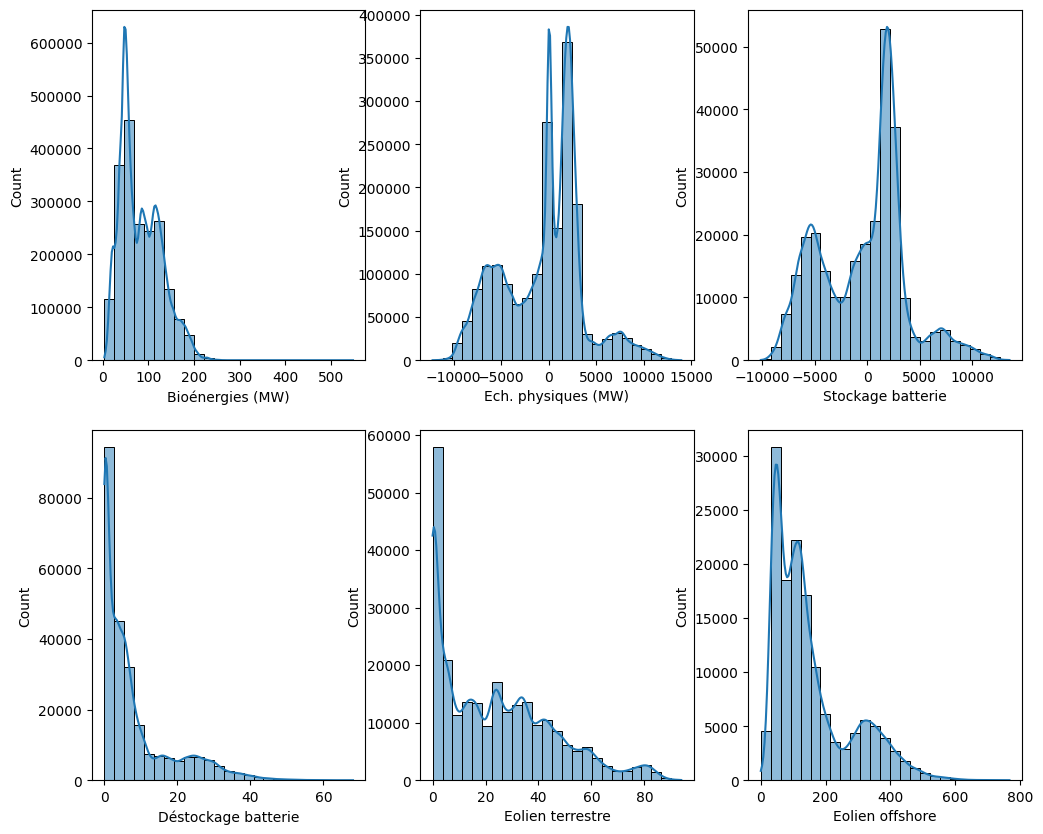

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(231)
sns.histplot(data = df, x='Bioénergies (MW)', bins=25, kde=True)
plt.subplot(232)
sns.histplot(data = df, x='Ech. physiques (MW)', bins=25, kde=True)
plt.subplot(233)
sns.histplot(data = df, x='Stockage batterie', bins=25, kde=True)

plt.subplot(234)
sns.histplot(data = df, x='Déstockage batterie', bins=25, kde=True)
plt.subplot(235)
sns.histplot(data = df, x='Eolien terrestre', bins=25, kde=True)
plt.subplot(236)
sns.histplot(data = df, x='Eolien offshore', bins=25, kde=True)

<Axes: xlabel='TCH Eolien (%)', ylabel='Count'>

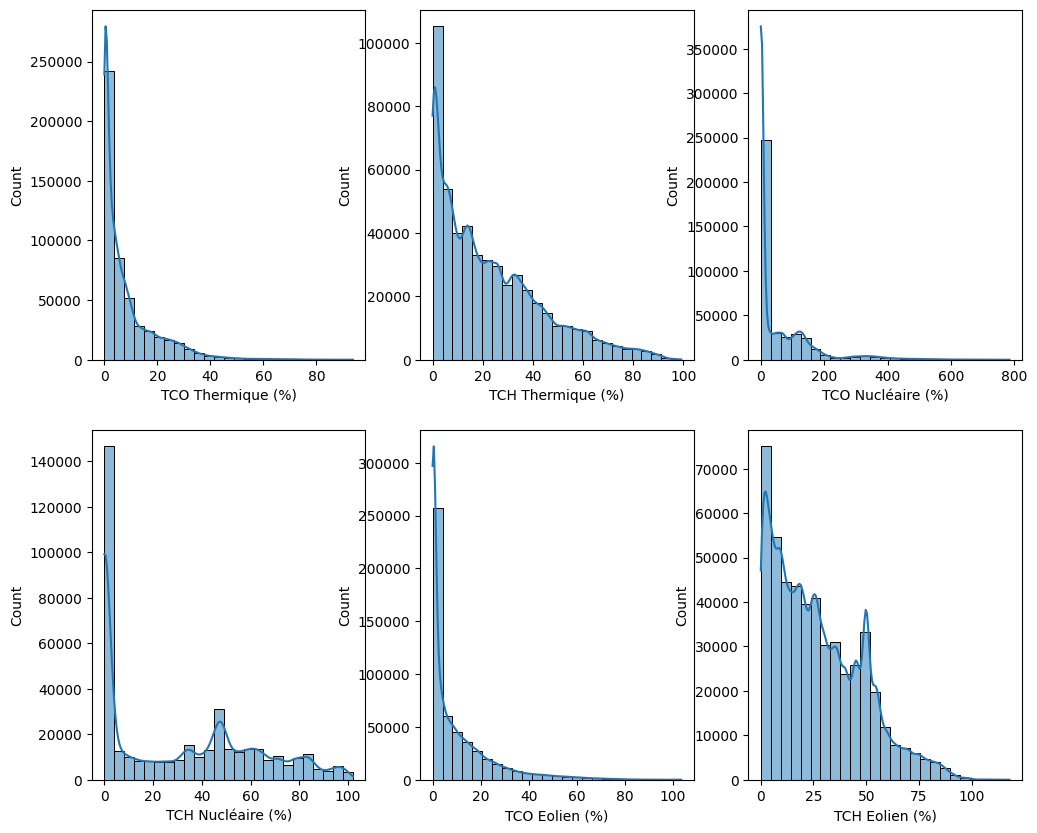

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(231)
sns.histplot(data = df, x='TCO Thermique (%)', bins=25, kde=True)
plt.subplot(232)
sns.histplot(data = df, x='TCH Thermique (%)', bins=25, kde=True)
plt.subplot(233)
sns.histplot(data = df, x='TCO Nucléaire (%)', bins=25, kde=True)

plt.subplot(234)
sns.histplot(data = df, x='TCH Nucléaire (%)', bins=25, kde=True)
plt.subplot(235)
sns.histplot(data = df, x='TCO Eolien (%)', bins=25, kde=True)
plt.subplot(236)
sns.histplot(data = df, x='TCH Eolien (%)', bins=25, kde=True)

<Axes: xlabel='TCH Bioénergies (%)', ylabel='Count'>

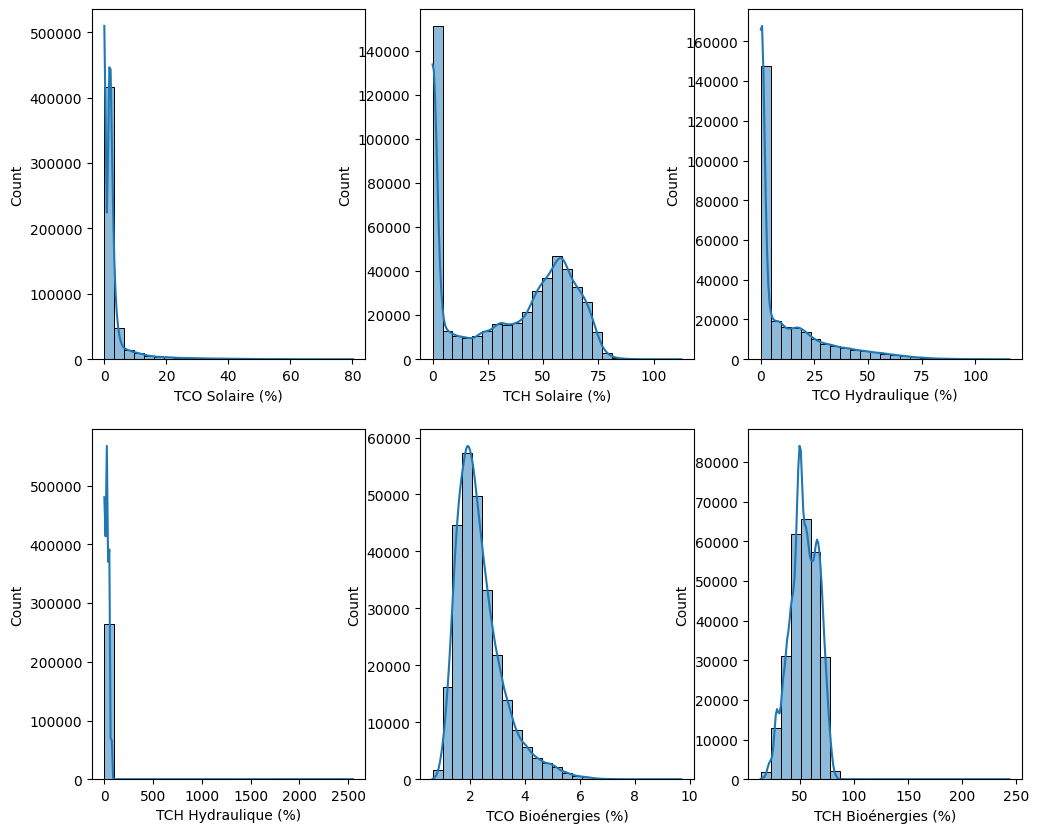

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(231)
sns.histplot(data = df, x='TCO Solaire (%)', bins=25, kde=True)
plt.subplot(232)
sns.histplot(data = df, x='TCH Solaire (%)', bins=25, kde=True)
plt.subplot(233)
sns.histplot(data = df, x='TCO Hydraulique (%)', bins=25, kde=True)

plt.subplot(234)
sns.histplot(data = df, x='TCH Hydraulique (%)', bins=25, kde=True)
plt.subplot(235)
sns.histplot(data = df, x='TCO Bioénergies (%)', bins=25, kde=True)
plt.subplot(236)
sns.histplot(data = df, x='TCH Bioénergies (%)', bins=25, kde=True)